In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Firstly, I will read in the data for major 3 and combined both datasets

In [24]:
d1 = pd.read_csv("../data/major3_week2_short.csv")
d2 = pd.read_csv("../data/major3_week1_short.csv")
d4 = pd.read_csv("../data/major2_week2_short.csv")
d5 = pd.read_csv("../data/major2_week3_short.csv")

d1["kd"] = d5["kd"].astype("float")
d2["kd"] = d2["kd"].astype("float")



data = pd.concat([d1, d2, d4, d5])
data.drop("index", axis=1, inplace=True)

data["kills"] = data["kills"].astype("float")
data["deaths"] = data["deaths"].astype("float")
data["kd"] = (data["kills"]/data["deaths"]).round(2)
data.sample(10)

,player,kills,deaths,kd,hill_time,team_name,team_score,map_outcome,matchID,map_winner,mode,gametime,match_winner,first_kill,first_death,plant,defuse,captures
90,Owakening,23.0,17.0,1.35,NaN,Boston Breach,3,winner,BBTUW1M3,Fortress,Control,10:14,Boston Breach,NaN,NaN,NaN,NaN,0.0
298,Kenny,5.0,6.0,0.83,NaN,Los Angeles Thieves,1,loser,LATAFW1M3,El Asilo,SearchandDestroy,8:07,Los Angeles Thieves,0.0,0.0,1.0,0.0,NaN
103,SlasheR,11.0,7.0,1.57,NaN,Atlanta FaZe,6,winner,LAGAFW3M2,El Asilo,SearchandDestroy,11:20,Los Angeles Guerrillas,3.0,1.0,0.0,0.0,NaN
133,Havok,16.0,17.0,0.94,14.0,Florida Mutineers,211,loser,BBFMW2M3,Hydro,Hardpoint,10:55,Boston Breach,NaN,NaN,NaN,NaN,NaN
67,Arcitys,8.0,12.0,0.67,NaN,Los Angeles Guerrillas,0,loser,LAGBBW2M3,El Asilo,Control,7:55,Los Angeles Guerrillas,NaN,NaN,NaN,NaN,0.0
304,Octane,21.0,19.0,1.11,NaN,Los Angeles Thieves,3,winner,LATAFW1M3,Hotel,Control,13:04,Los Angeles Thieves,NaN,NaN,NaN,NaN,6.0
193,Afro,9.0,5.0,1.80,NaN,Minnesota RØKKR,6,winner,MRAFW2M2,Hotel,SearchandDestroy,11:00,Minnesota RØKKR,3.0,3.0,0.0,0.0,NaN
170,CleanX,21.0,14.0,1.50,NaN,Toronto Ultra,3,winner,TUOTW2M2,Fortress,Control,7:25,Toronto Ultra,NaN,NaN,NaN,NaN,0.0
279,Skrapz,25.0,18.0,1.39,75.0,London Royal Ravens,250,winner,LAGLRRW2M3,Mercado,Hardpoint,11:01,Los Angeles Guerrillas,NaN,NaN,NaN,NaN,NaN
334,aBeZy,28.0,29.0,0.97,44.0,Atlanta FaZe,248,loser,OTAFW3M2,Hotel,Hardpoint,11:58,OpTic Texas,NaN,NaN,NaN,NaN,NaN


Next, I will pull the matches that include Optic Texas in order to analyse their statistics following the signing of 'Ghosty'

In [25]:
optic_match_ids = data[data['team_name']=="OpTic Texas"]["matchID"].unique()
print(f"The match ID's for OpTic's Major 3 Week 2 matches are: {optic_match_ids}")

The match ID's for OpTic's Major 3 Week 2 matches are: ['TUOTW2M3' 'MROTW2M3' 'LAGOTW1M3' 'SSOTW2M2' 'TUOTW2M2' 'LVLOTW3M2'
 'OTAFW3M2']


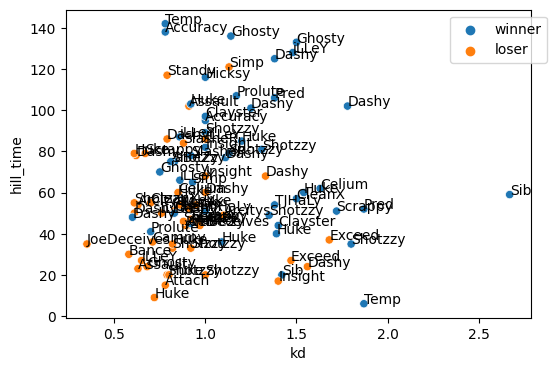

In [26]:
optic_data = data[data["matchID"].isin(optic_match_ids)]
optic_data.sample(10)
optic_hp = optic_data[optic_data["mode"]=="Hardpoint"]
optic_hp.reset_index(inplace=True)

plt.figure(figsize=(6,4))
sns.scatterplot(data=optic_hp, x="kd", y="hill_time", hue="map_outcome")
plt.legend(bbox_to_anchor=(1.05, 1))
for player in range(len(optic_hp['player'])):
    plt.text(x=optic_hp["kd"][player], y=optic_hp["hill_time"][player], s=optic_hp["player"][player])
    

I will compare the HP win conditions for different teams, firstly starting with LA Thieves and OpTic

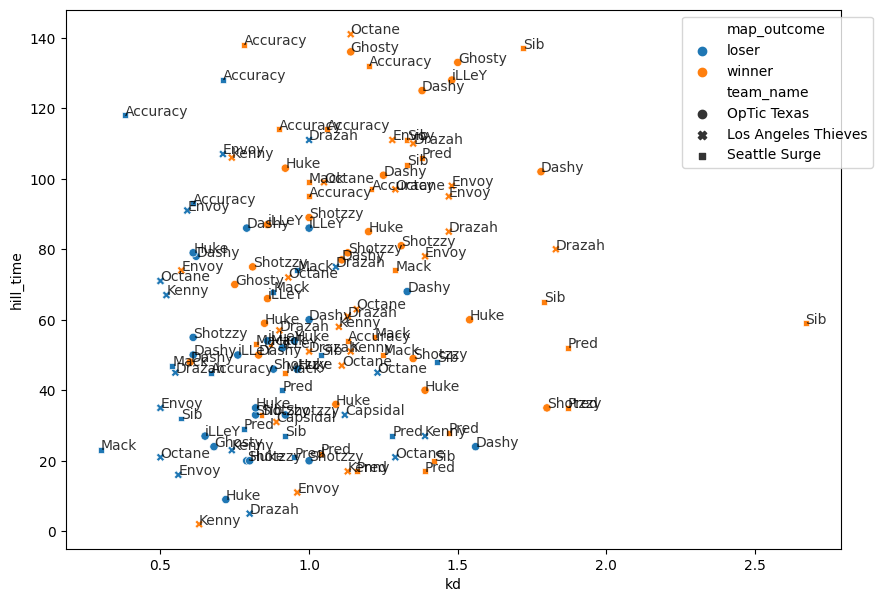

In [27]:
thieves_optic = data[data["team_name"].isin(["Los Angeles Thieves", "OpTic Texas", "Seattle Surge"])]
thieves_optic_hp = thieves_optic[thieves_optic["mode"]=="Hardpoint"]
thieves_optic_hp.reset_index(inplace=True)
thieves_optic_hp.sample(5)

fig = plt.figure(figsize=(10, 7))
ax1 = fig.subplots(ncols=1)

sns.scatterplot(data=thieves_optic_hp, x="kd", y="hill_time", hue="map_outcome", ax=ax1, style="team_name")
for player in range(len(thieves_optic_hp['player'])):
    ax1.text(x=thieves_optic_hp["kd"][player], y=thieves_optic_hp["hill_time"][player], s=thieves_optic_hp["player"][player],
    alpha=0.8)

plt.legend(bbox_to_anchor=(1.05, 1))


               

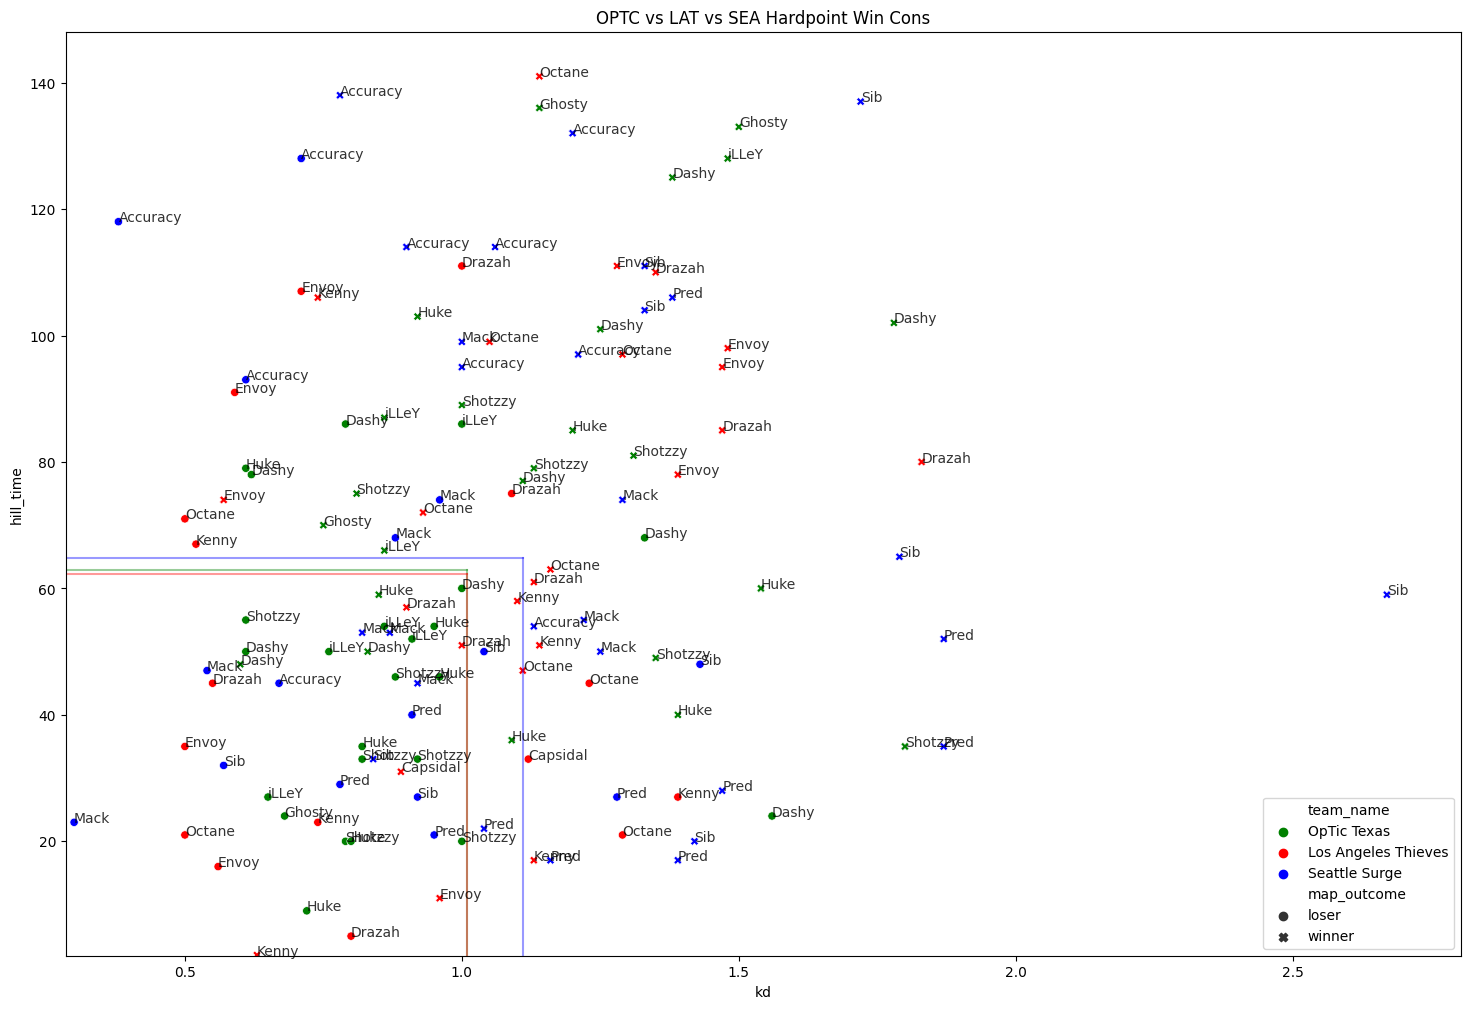

In [28]:
averages = thieves_optic_hp.groupby("team_name").mean().round(2)
averages.drop("index", axis=1, inplace=True)
LAT_avg = averages[averages.index=="Los Angeles Thieves"]
OPTC_avg = averages[averages.index=="OpTic Texas"]
SEA_avg = averages[averages.index=="Seattle Surge"]

fig = plt.figure(figsize=(18, 12))
ax1 = fig.subplots(ncols=1)

sns.scatterplot(data=thieves_optic_hp, x="kd", y="hill_time", hue="team_name", ax=ax1, style="map_outcome",
                palette={"OpTic Texas": "green",
                        "Los Angeles Thieves": "red",
                        "Seattle Surge": "blue"})
for player in range(len(thieves_optic_hp['player'])):
    ax1.text(x=thieves_optic_hp["kd"][player], y=thieves_optic_hp["hill_time"][player], s=thieves_optic_hp["player"][player],
    alpha=0.8)

plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlim(thieves_optic_hp.kd.min()*0.95, thieves_optic_hp.kd.max()*1.05)
plt.ylim(thieves_optic_hp.hill_time.min()*0.95, thieves_optic_hp.hill_time.max()*1.05)

ax1.plot([thieves_optic_hp.kd.min()*0.95, OPTC_avg.kd[0]],[OPTC_avg.hill_time[0], OPTC_avg.hill_time[0]], color="green", alpha=0.4)
ax1.plot([OPTC_avg.kd[0], OPTC_avg.kd[0]],[thieves_optic_hp.hill_time.min()*0.95, OPTC_avg.hill_time[0]], color="green", alpha=0.4)

ax1.plot([thieves_optic_hp.kd.min()*0.95, LAT_avg.kd[0]],[LAT_avg.hill_time[0], LAT_avg.hill_time[0]], color="red", alpha=0.4)
ax1.plot([LAT_avg.kd[0], LAT_avg.kd[0]],[thieves_optic_hp.hill_time.min()*0.95, LAT_avg.hill_time[0]], color="red", alpha=0.4)

ax1.plot([thieves_optic_hp.kd.min()*0.95, SEA_avg.kd[0]],[SEA_avg.hill_time[0], SEA_avg.hill_time[0]], color="blue", alpha=0.4)
ax1.plot([SEA_avg.kd[0], SEA_avg.kd[0]],[thieves_optic_hp.hill_time.min()*0.95, SEA_avg.hill_time[0]], color="blue", alpha=0.4)

plt.legend(loc="lower right");
plt.title("OPTC vs LAT vs SEA Hardpoint Win Cons");

,player,kills,deaths,kd,hill_time,team_name,team_score,map_outcome,matchID,map_winner,mode,gametime,match_winner,first_kill,first_death,plant,defuse,captures
32,Sib,27.0,19.0,1.42,20.0,Seattle Surge,250,winner,SSOTW2M2,Fortress,Hardpoint,9:12,Seattle Surge,NaN,NaN,NaN,NaN,NaN
33,Accuracy,19.0,19.0,1.00,95.0,Seattle Surge,250,winner,SSOTW2M2,Fortress,Hardpoint,9:12,Seattle Surge,NaN,NaN,NaN,NaN,NaN
34,Mack,22.0,24.0,0.92,45.0,Seattle Surge,250,winner,SSOTW2M2,Fortress,Hardpoint,9:12,Seattle Surge,NaN,NaN,NaN,NaN,NaN
35,Pred,22.0,16.0,1.38,106.0,Seattle Surge,250,winner,SSOTW2M2,Fortress,Hardpoint,9:12,Seattle Surge,NaN,NaN,NaN,NaN,NaN
36,Shotzzy,19.0,19.0,1.00,20.0,OpTic Texas,167,loser,SSOTW2M2,Fortress,Hardpoint,9:12,Seattle Surge,NaN,NaN,NaN,NaN,NaN
37,Dashy,19.0,24.0,0.79,86.0,OpTic Texas,167,loser,SSOTW2M2,Fortress,Hardpoint,9:12,Seattle Surge,NaN,NaN,NaN,NaN,NaN
38,Huke,20.0,25.0,0.80,20.0,OpTic Texas,167,loser,SSOTW2M2,Fortress,Hardpoint,9:12,Seattle Surge,NaN,NaN,NaN,NaN,NaN
39,iLLeY,20.0,22.0,0.91,52.0,OpTic Texas,167,loser,SSOTW2M2,Fortress,Hardpoint,9:12,Seattle Surge,NaN,NaN,NaN,NaN,NaN
40,Sib,4.0,8.0,0.50,NaN,Seattle Surge,4,loser,SSOTW2M2,Embassy,SearchandDestroy,8:24,Seattle Surge,1.0,0.0,0.0,1.0,NaN
41,Accuracy,1.0,7.0,0.14,NaN,Seattle Surge,4,loser,SSOTW2M2,Embassy,SearchandDestroy,8:24,Seattle Surge,1.0,1.0,0.0,0.0,NaN


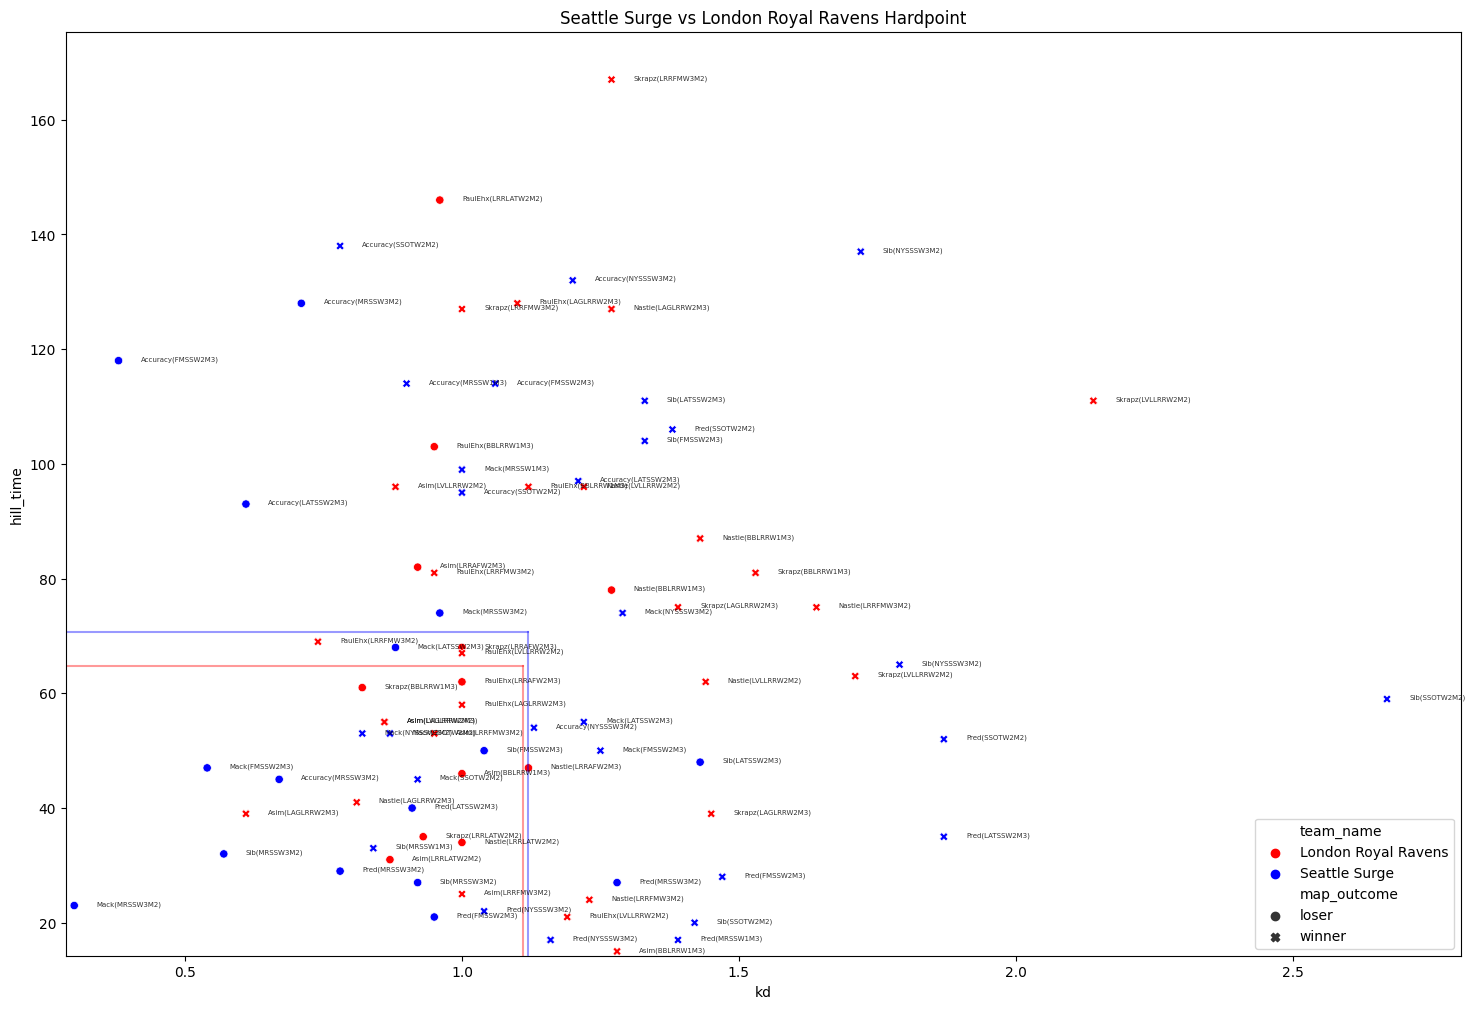

In [34]:
from analysis_utils import hp_compare

drawing = hp_compare(data, "Seattle Surge", "London Royal Ravens", "blue", "red");
data[data["matchID"]=="SSOTW2M2"]

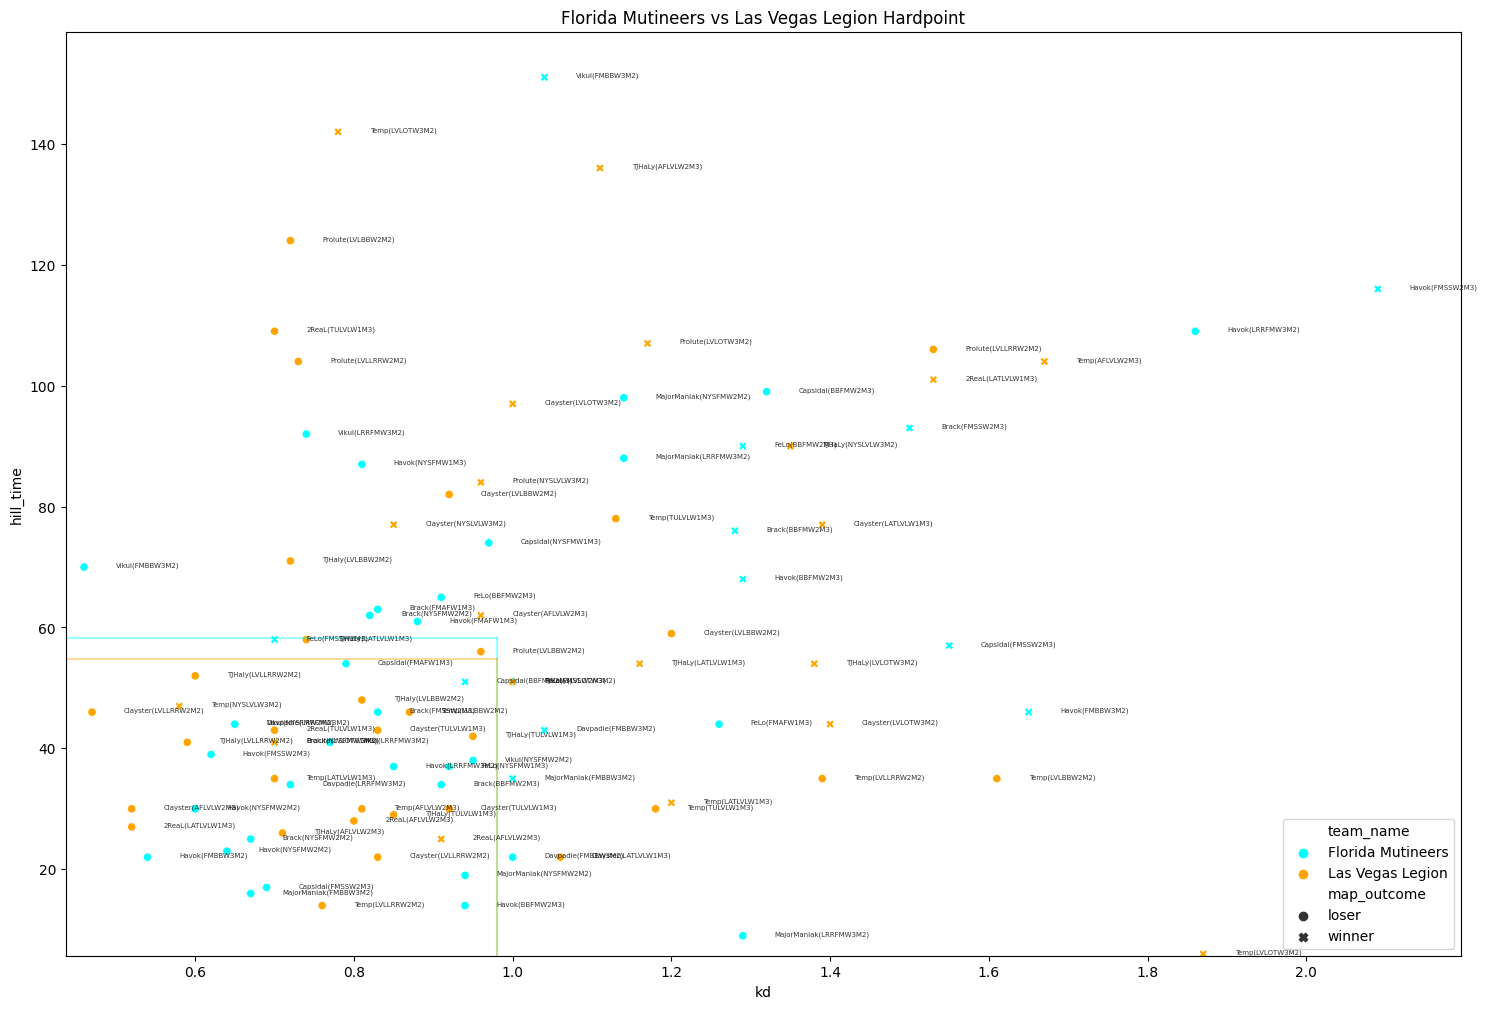

In [30]:
drawing = hp_compare(data, "Florida Mutineers", "Las Vegas Legion", "cyan", "orange");

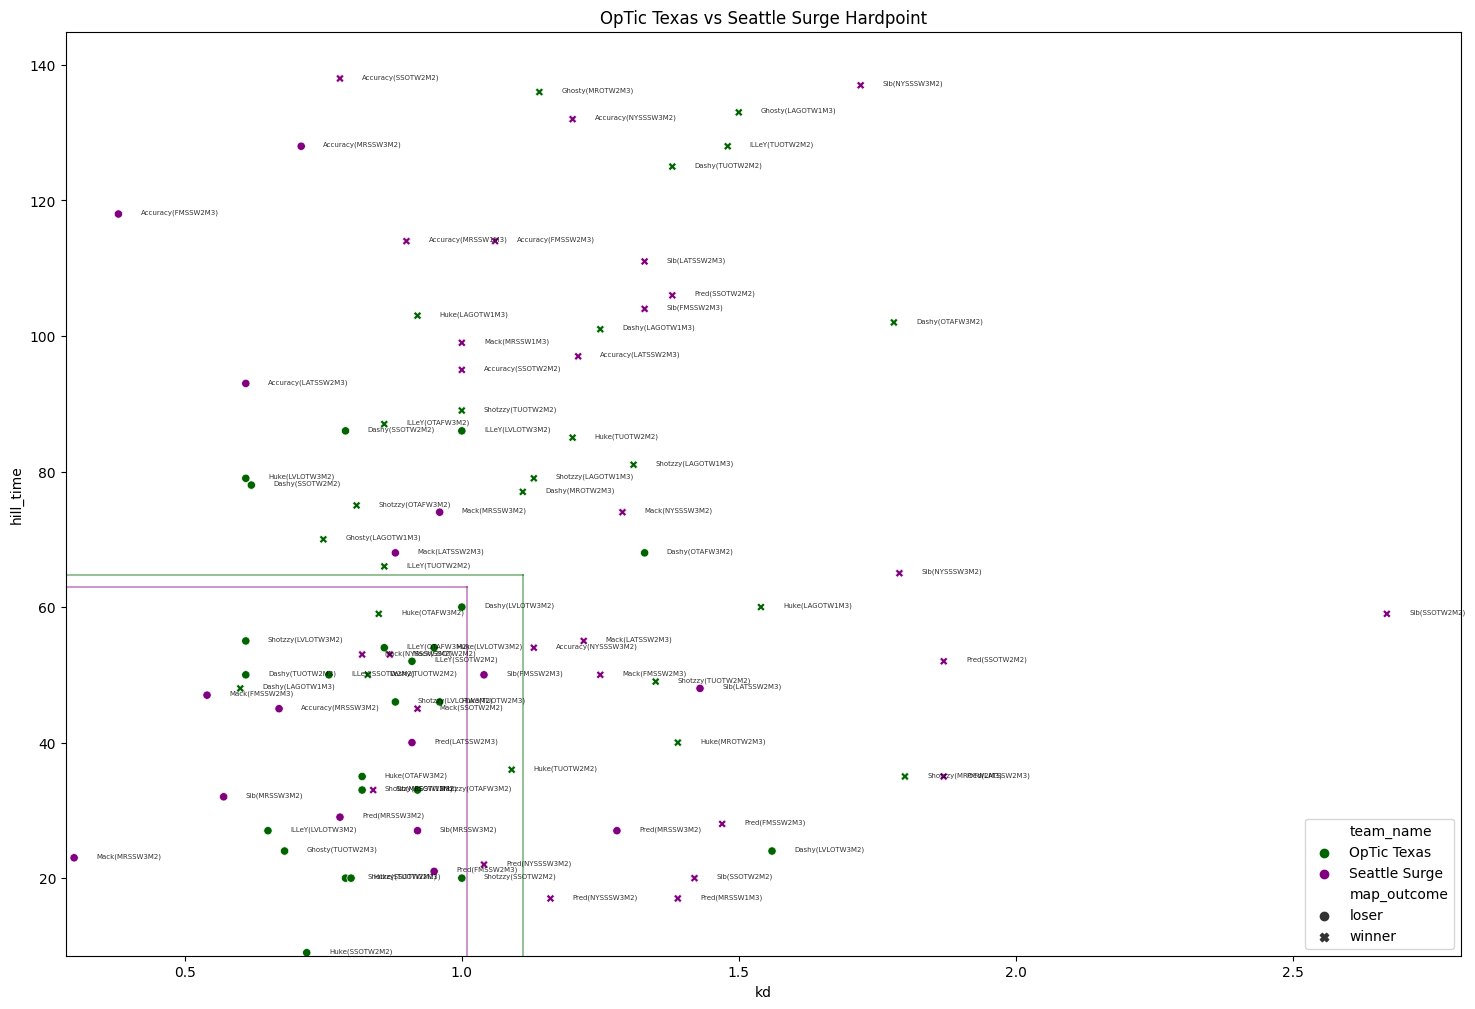

In [32]:
drawing = hp_compare(data, "OpTic Texas", "Seattle Surge", "darkgreen", "purple");